In [72]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import statsmodels.api as s
from statsmodels.stats.outliers_influence import summary_table

Prob1: Restaurant Icecream sales
(Method 1)

In [37]:
data = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/lrm.xlsx')
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


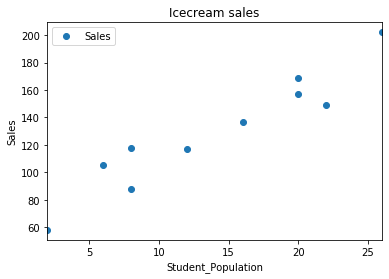

In [38]:
data.plot('Student_Population', 'Sales', style = 'o')
plt.ylabel('Sales')
plt.title('Icecream sales')
plt.show()

In [40]:
St_pop = data['Student_Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = s.OLS(sales, st_pop)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        00:54:18   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\suvar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Prob1: (Method 2)

In [91]:
x = data['Student_Population'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

In [58]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, normalize = False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

Point Estimate for x = 10

In [81]:
reg.predict(np.array([[10]]))

array([[110.]])

In [49]:
x = data['Student_Population']
y = data['Sales']

Confidence Interval Plotting

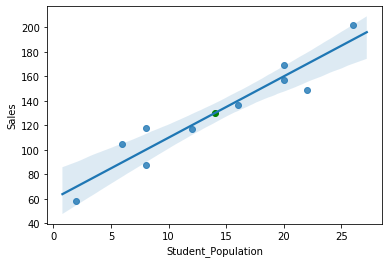

In [52]:
plt.figure()
sns.regplot(x,y, fit_reg = True)
plt.scatter(np.mean(x), np.mean(y), color = "green")

In [56]:
st, data1, ss2 = summary_table(result1, alpha = 0.05)
fittedvalue = data1[:,2] # 3rd column
predict_mean_se = data1[:,3] # 4th column
predict_mean_ci_low, predict_mean_ci_upp = data1[:,4:6].T  
# ci - conf interval; 4th - 6th column
predict_ci_low, predict_ci_upp = data1[:,6:8].T  # 6th to 8th column

In [63]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [64]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [65]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [66]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

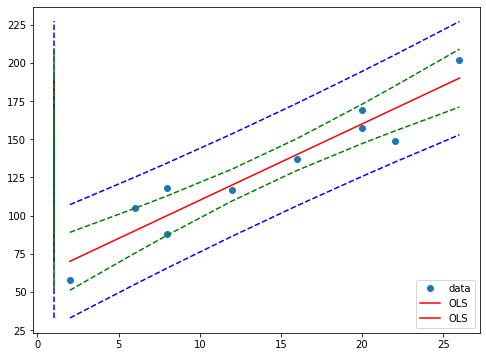

In [68]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'o', label = "data")
ax.plot(X, fittedvalue, 'r-', label = 'OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc = 'best');
plt.show()

Part II

1) Residual Plot against x

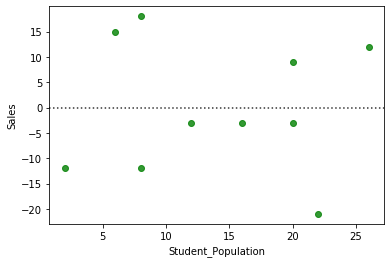

In [105]:
sns.residplot(data['Student_Population'], data['Sales'], color = "g")

(3)Standardized Residuals

In [94]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [95]:
df1 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/Icecream.xlsx')
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [97]:
reg1 = ols(formula = 'Sales ~ Student_Population', data = df1)
fit1 = reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        00:50:05   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [98]:
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [99]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external

In [100]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

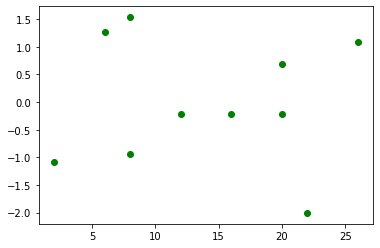

In [101]:
plt.figure()
plt.scatter(df1['Student_Population'], resid_student, color = "green")

(4) Normal Prob Plot

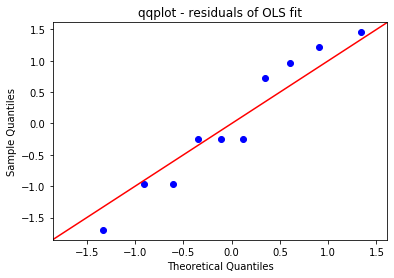

In [103]:
res = fit1.resid
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()